# Introduction

1. This kernel is a detailed guide for transfer learning on Pollen Grain problem.

2. The aim of this kernel is to show you how to use pre-trained CNN models for transfer learning techniques.

3. The Dataset has been taken from kaggle and contains 790 pollen images of 23 pollen types. [Link](https://www.kaggle.com/andrewmvd/pollen-grain-image-classification)


In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
work_dir = '../input/pollen-grain-image-classification'

In [3]:
image_name = os.listdir(work_dir) 

In [4]:
image_type = [image.replace(' ','_').split('_')[0] for image in image_name] 

In [6]:
#Creating dataframe for ImageDataGenerator
df = pd.DataFrame() 
df['image_name']=image_name
df['image_type']=image_type

In [7]:
df.head()

,image_name,image_type
0,combretum_11.jpg,combretum
1,faramea_15.jpg,faramea
2,myrcia_34.jpg,myrcia
3,croton_22.jpg,croton
4,arecaceae_16.jpg,arecaceae


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    shear_range=0.1,
    zoom_range=0.1,
    validation_split = 0.1
)

In [10]:
train_generator = datagen.flow_from_dataframe(
    df,
    directory='../input/pollen-grain-image-classification',
    x_col = 'image_name',
    y_col = 'image_type',
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

valid_generator = datagen.flow_from_dataframe(
    df,
    directory='../input/pollen-grain-image-classification',
    x_col = 'image_name',
    y_col = 'image_type',
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 711 validated image filenames belonging to 23 classes.
Found 79 validated image filenames belonging to 23 classes.


In [11]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential,Model

# Creating Simple CNN Model

In [12]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(299, 299, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(23, activation='softmax'))


In [13]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
train_steps = train_generator.n//train_generator.batch_size
valid_steps = valid_generator.n//valid_generator.batch_size

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=valid_steps
)

Epoch 1/50
22/22 [==============================] - 20s 919ms/step - loss: 9.6022 - accuracy: 0.0398 - val_loss: 3.1360 - val_accuracy: 0.0312
Epoch 2/50
22/22 [==============================] - 18s 808ms/step - loss: 3.1205 - accuracy: 0.0501 - val_loss: 3.1359 - val_accuracy: 0.0312
Epoch 3/50
22/22 [==============================] - 17s 784ms/step - loss: 3.1106 - accuracy: 0.0648 - val_loss: 3.0457 - val_accuracy: 0.1250
Epoch 4/50
22/22 [==============================] - 18s 839ms/step - loss: 2.8946 - accuracy: 0.0923 - val_loss: 3.0074 - val_accuracy: 0.0938
Epoch 5/50
22/22 [==============================] - 18s 829ms/step - loss: 2.7582 - accuracy: 0.1429 - val_loss: 2.8401 - val_accuracy: 0.1562
Epoch 6/50
22/22 [==============================] - 18s 824ms/step - loss: 2.6758 - accuracy: 0.1449 - val_loss: 2.6917 - val_accuracy: 0.1562
Epoch 7/50
22/22 [==============================] - 19s 849ms/step - loss: 2.5568 - accuracy: 0.1988 - val_loss: 2.6646 - val_accuracy: 0.1562

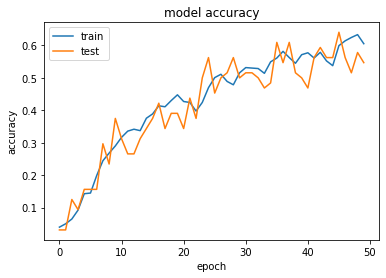

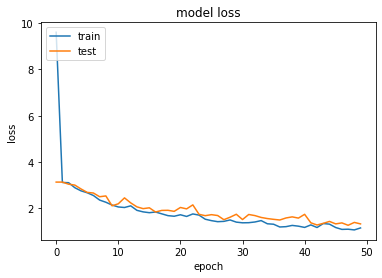

In [16]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Creating model using InceptionV3

In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocess_input = preprocess_input

In [18]:
inception_datagen = ImageDataGenerator(
    rotation_range = 90,
    shear_range=0.1,
    zoom_range=0.1,
    preprocessing_function=inception_preprocess_input,
    validation_split = 0.1
)

In [19]:
inception_train_generator = inception_datagen.flow_from_dataframe(
    df,
    directory='../input/pollen-grain-image-classification',
    x_col = 'image_name',
    y_col = 'image_type',
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

inception_valid_generator = inception_datagen.flow_from_dataframe(
    df,
    directory='../input/pollen-grain-image-classification',
    x_col = 'image_name',
    y_col = 'image_type',
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 711 validated image filenames belonging to 23 classes.
Found 79 validated image filenames belonging to 23 classes.


In [20]:
inception_base = InceptionV3(include_top=False,weights='imagenet',input_shape=(299,299,3))

87916544/87910968 [==============================] - 1s 0us/step


In [21]:
inception_base.trainable = False

In [22]:
inception_model = Sequential()
inception_model.add(inception_base)
inception_model.add(GlobalAveragePooling2D())
inception_model.add(Dense(1024,activation='relu'))
inception_model.add(Dropout(0.4))
inception_model.add(Dense(512,activation='relu'))
inception_model.add(Dropout(0.3))
inception_model.add(Dense(23,activation='softmax'))

In [23]:
inception_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 23)               

In [24]:
inception_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [25]:
train_steps = inception_train_generator.n//inception_train_generator.batch_size
valid_steps = inception_valid_generator.n//inception_valid_generator.batch_size

In [26]:
inception_history = inception_model.fit(
    inception_train_generator,
    steps_per_epoch=train_steps,
    epochs=25,
    validation_data=inception_valid_generator,
    validation_steps=valid_steps
)

Epoch 1/25
22/22 [==============================] - 18s 836ms/step - loss: 2.8716 - accuracy: 0.2032 - val_loss: 1.8485 - val_accuracy: 0.4375
Epoch 2/25
22/22 [==============================] - 17s 767ms/step - loss: 1.6593 - accuracy: 0.4786 - val_loss: 1.3943 - val_accuracy: 0.5469
Epoch 3/25
22/22 [==============================] - 16s 735ms/step - loss: 1.2552 - accuracy: 0.5906 - val_loss: 0.9760 - val_accuracy: 0.6875
Epoch 4/25
22/22 [==============================] - 16s 721ms/step - loss: 0.9183 - accuracy: 0.7099 - val_loss: 0.7929 - val_accuracy: 0.7500
Epoch 5/25
22/22 [==============================] - 17s 780ms/step - loss: 0.8631 - accuracy: 0.7128 - val_loss: 0.8161 - val_accuracy: 0.7500
Epoch 6/25
22/22 [==============================] - 17s 768ms/step - loss: 0.6647 - accuracy: 0.7894 - val_loss: 0.7286 - val_accuracy: 0.7031
Epoch 7/25
22/22 [==============================] - 17s 763ms/step - loss: 0.6711 - accuracy: 0.7894 - val_loss: 0.6423 - val_accuracy: 0.7969

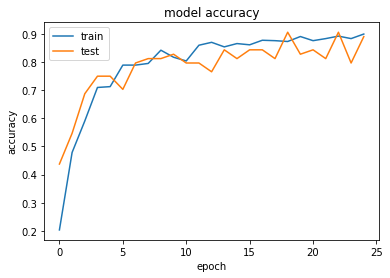

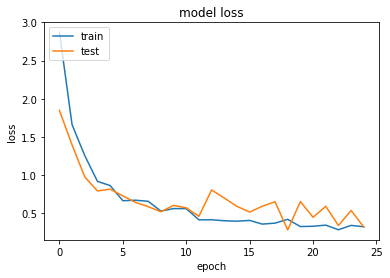

In [27]:
# summarize history for accuracy
plt.plot(inception_history.history['accuracy'])
plt.plot(inception_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(inception_history.history['loss'])
plt.plot(inception_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusion
1. Pretrained Model can be used to boost accuracy.
2. In our case InceptionV3 gives 80+ validation accuracy in just 8 epochs on the other hand our simple CNN model gives validation accuracy of around 60% after 50 epochs.
3. Furthermore after 25 epochs InceprionV3 gives 89+ validation accuracy 